In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
# Per data period, arm=(0,1)
def aperture_parametrisation( period, arm, xangle, xi ):

    #https://github.com/cms-sw/cmssw/tree/916cb3d20213734a0465240720c8c8c392b92eac/Validation/CTPPS/python/simu_config

    if (period == "2016_preTS2"):
        if   (arm == 0): return 3.76296E-05+((xi<0.117122)*0.00712775+(xi>=0.117122)*0.0148651)*(xi-0.117122);
        elif (arm == 1): return 1.85954E-05+((xi<0.14324)*0.00475349+(xi>=0.14324)*0.00629514)*(xi-0.14324);
    elif (period == "2016_postTS2"):
        if   (arm == 0): return 6.10374E-05+((xi<0.113491)*0.00795942+(xi>=0.113491)*0.01935)*(xi-0.113491);
        elif (arm == 1): return (xi-0.110)/130.0;
    elif (period == "2017_preTS2"):
        if   (arm == 0): return -(8.71198E-07*xangle-0.000134726)+((xi<(0.000264704*xangle+0.081951))*-(4.32065E-05*xangle-0.0130746)+(xi>=(0.000264704*xangle+0.081951))*-(0.000183472*xangle-0.0395241))*(xi-(0.000264704*xangle+0.081951));
        elif (arm == 1): return 3.43116E-05+((xi<(0.000626936*xangle+0.061324))*0.00654394+(xi>=(0.000626936*xangle+0.061324))*-(0.000145164*xangle-0.0272919))*(xi-(0.000626936*xangle+0.061324));
    elif (period == "2017_postTS2"):
        if   (arm == 0): return -(8.92079E-07*xangle-0.000150214)+((xi<(0.000278622*xangle+0.0964383))*-(3.9541e-05*xangle-0.0115104)+(xi>=(0.000278622*xangle+0.0964383))*-(0.000108249*xangle-0.0249303))*(xi-(0.000278622*xangle+0.0964383));
        elif (arm == 1): return 4.56961E-05+((xi<(0.00075625*xangle+0.0643361))*-(3.01107e-05*xangle-0.00985126)+(xi>=(0.00075625*xangle+0.0643361))*-(8.95437e-05*xangle-0.0169474))*(xi-(0.00075625*xangle+0.0643361));
    elif (period == "2018"):
        if   (arm == 0): return -(8.44219E-07*xangle-0.000100957)+((xi<(0.000247185*xangle+0.101599))*-(1.40289E-05*xangle-0.00727237)+(xi>=(0.000247185*xangle+0.101599))*-(0.000107811*xangle-0.0261867))*(xi-(0.000247185*xangle+0.101599));
        elif (arm == 1): return -(-4.74758E-07*xangle+3.0881E-05)+((xi<(0.000727859*xangle+0.0722653))*-(2.43968E-05*xangle-0.0085461)+(xi>=(0.000727859*xangle+0.0722653))*-(7.19216E-05*xangle-0.0148267))*(xi-(0.000727859*xangle+0.0722653));
    else:
        return -999.

In [3]:
def check_aperture( period, arm, xangle, xi, theta_x ):
    return ( theta_x < -aperture_parametrisation( period, arm, xangle, xi ) )

[0.0858902  0.13848943 0.23402574 ... 0.21969987 0.06514921 0.21794805]
[ 8.60522866e-05 -9.17852530e-06  5.40379236e-05 ... -3.86480243e-05
 -1.02890369e-04  3.39393875e-05]
[ True False False ... False  True False]
[ True False False ... False  True False]
50000


(-0.0003, 0.0003)

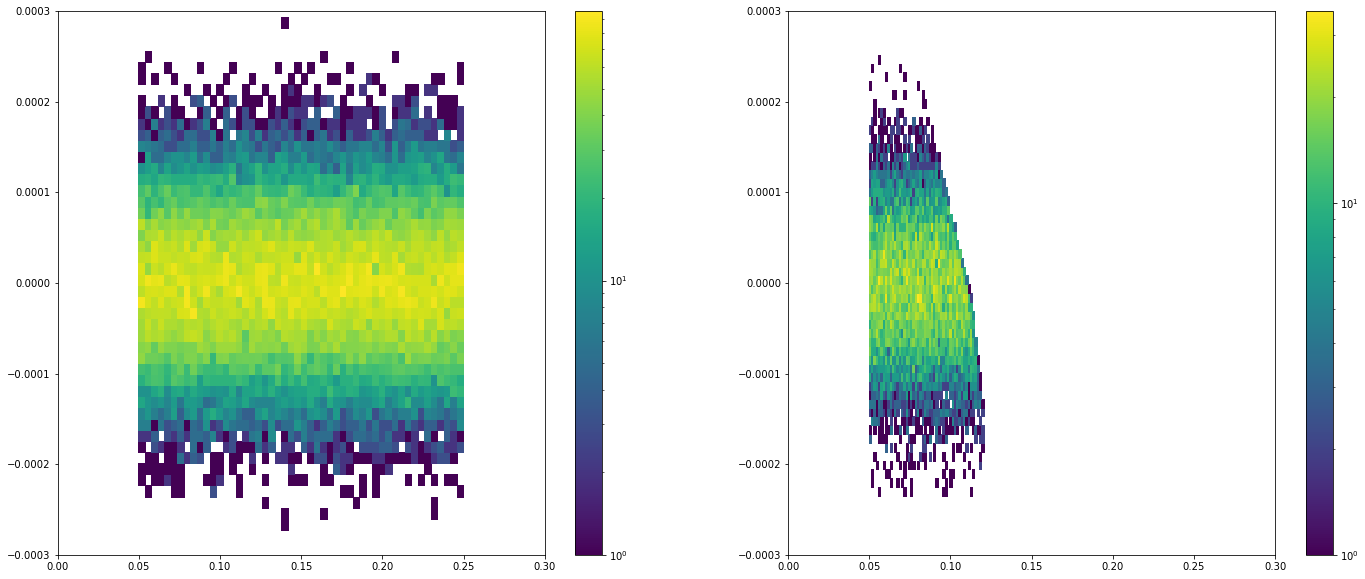

In [6]:
data_periods = [ "2017B", "2017C1", "2017E", "2017F1" ]
aperture_period_map_ = {
    "2016_preTS2"  : "2016_preTS2",
    "2016_postTS2" : "2016_postTS2",
    "2017B"        : "2017_preTS2",
    "2017C1"       : "2017_preTS2",
    "2017C2"       : "2017_preTS2",
    "2017D"        : "2017_preTS2",
    "2017E"        : "2017_postTS2",
    "2017F1"       : "2017_postTS2",
    "2017F2"       : "2017_postTS2",
    "2017F3"       : "2017_postTS2",
    "2018"         : "2018"
}
xi_ = 0.05 + np.random.rand( 50000 ) * ( 0.25 - 0.05 )
theta_x_ = np.sqrt( 60.e-06**2 + 30.e-06**2 ) * np.random.randn( 50000 )
print ( xi_ )
print ( theta_x_ )

period_ = "2017C1"
arm_ = 0
xangle_ = 120.
df_ = pd.DataFrame( { "xi": xi_, "theta_x": theta_x_ } )
df_[ "theta_x_upper_limit" ] = df_[ "xi" ].map( lambda xi: -aperture_parametrisation( aperture_period_map_[ period_ ], arm_, xangle_, xi ) )

msk_ = ( df_[ "theta_x" ] < df_[ "theta_x_upper_limit" ] ).get_values() 
print ( msk_ )
msk = df_.apply( lambda row: check_aperture( aperture_period_map_[ period_ ], arm_, xangle_, row["xi"], row["theta_x"] ), axis=1 ).get_values()
print ( msk )
print ( np.sum( msk == msk_ ) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
counts_, xedges_, yedges_, im_ = axes[0].hist2d( df_[ "xi" ], df_[ "theta_x" ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im_, ax=axes[0])
counts_, xedges_, yedges_, im_ = axes[1].hist2d( df_[ "xi" ][ msk ], df_[ "theta_x" ][ msk ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im_, ax=axes[1])
axes[0].set_xlim( 0., 0.30 )
axes[0].set_ylim( -300.e-06, 300.e-06 )
axes[1].set_xlim( 0., 0.30 )
axes[1].set_ylim( -300.e-06, 300.e-06 )

## Data

In [7]:
from processing import get_data, process_data

proton_selection = "MultiRP"

fileNames_data = [
    'output/output-UL2017B-PreSel.h5',
    'output/output-UL2017C1-PreSel.h5',
    'output/output-UL2017E-PreSel.h5',
    'output/output-UL2017F1-PreSel.h5'
]

df_counts_data, df_data = get_data( fileNames_data )
df_data = process_data( df_data, proton_selection )

output/output-UL2017B-PreSel.h5
['columns', 'event_counts', 'protons', 'selections']
(107075, 39)
[[2.9722700e+05 5.3000000e+01 2.2970000e+03 ... 9.8301208e-01
  5.6195408e-02 4.0912917e-03]
 [2.9722700e+05 5.5000000e+01 8.6700000e+02 ... 1.3261172e-01
  1.9532344e-03 4.8346210e-02]
 [2.9722700e+05 5.5000000e+01 8.6700000e+02 ... 1.3261172e-01
  1.9532344e-03 4.8346210e-02]
 ...
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]
 [2.9906200e+05 1.3300000e+02 1.7210000e+03 ... 6.6481882e-01
  3.5217716e-03 7.5678416e-02]]
(39,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'Slice', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b

KeyError: "['TrackPixShift_SingleRP', 'Track2PixShift_MultiRP', 'Track1PixShift_MultiRP', 'nVertices'] not in index"

In [ ]:
df_data

In [ ]:
df_data[ ['MultiRP', 'Arm', 'RPId1', 'RPId2',
          'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
          'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
          'Xi', 'T', 'ThX', 'ThY'] ]

In [ ]:
run_ranges_periods = {}
run_ranges_periods[ "2017B" ]  = (297020,299329)
run_ranges_periods[ "2017C1" ] = (299337,300785)
run_ranges_periods[ "2017C2" ] = (300806,302029)
run_ranges_periods[ "2017D" ]  = (302030,303434)
run_ranges_periods[ "2017E" ]  = (303435,304826)
run_ranges_periods[ "2017F1" ] = (304911,305114)
run_ranges_periods[ "2017F2" ] = (305178,305902)
run_ranges_periods[ "2017F3" ] = (305965,306462)
print ( run_ranges_periods )

df_run_ranges = pd.DataFrame( run_ranges_periods, index=("min","max") ).transpose()

run_=300000
print ( df_run_ranges.index[ ( df_run_ranges["min"] <= run_ ) & ( df_run_ranges["max"] >= run_ ) ].tolist() )

#f_data_period_ = lambda x: df_run_ranges.index[ ( df_run_ranges["min"] <= x ) & ( df_run_ranges["max"] >= x ) ].tolist()
#df_data["period"] = df_data.apply( f_data_period_, axis=1 )
#df_data["period"] = df_data["Run"].map( f_data_period_ )

df_data.loc[ :, "period" ] = np.nan
for idx_ in range( df_run_ranges.shape[0] ):
    msk_period_ = ( ( df_data[ "Run" ] >= df_run_ranges.iloc[ idx_ ][ "min" ] ) & ( df_data[ "Run" ] <= df_run_ranges.iloc[ idx_ ][ "max" ] ) )
    sum_period_ = np.sum( msk_period_ )
    if sum_period_ > 0:
        period_key_ = df_run_ranges.index[ idx_ ]
        df_data.loc[ :, "period" ].loc[ msk_period_ ] = period_key_
        print ( "{}: {}".format( period_key_, sum_period_ ) )

In [ ]:
aperture_period_map_ = {
    "2016_preTS2"  : "2016_preTS2",
    "2016_postTS2" : "2016_postTS2",
    "2017B"        : "2017_preTS2",
    "2017C1"       : "2017_preTS2",
    "2017C2"       : "2017_preTS2",
    "2017D"        : "2017_preTS2",
    "2017E"        : "2017_postTS2",
    "2017F1"       : "2017_postTS2",
    "2017F2"       : "2017_postTS2",
    "2017F3"       : "2017_postTS2",
    "2018"         : "2018"
}

if proton_selection == "MultiRP":
    df_data[ "within_aperture" ] = df_data.apply( lambda row: check_aperture( aperture_period_map_[ row["period"][0] ], row["Arm"], row["CrossingAngle"], row["Xi"], row["ThX"] ), axis=1 )


In [ ]:
df_data

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
counts_, xedges_, yedges_, im_ = axes[0].hist2d( df_data[ "Xi" ], df_data[ "ThX" ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im_, ax=axes[0])
counts_, xedges_, yedges_, im_ = axes[1].hist2d( df_data[ "Xi" ][ df_data[ "within_aperture" ] ], df_data[ "ThX" ][ df_data[ "within_aperture" ] ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im_, ax=axes[1])
axes[0].set_xlim( 0., 0.20 )
axes[0].set_ylim( -300.e-06, 300.e-06 )
axes[1].set_xlim( 0., 0.20 )
axes[1].set_ylim( -300.e-06, 300.e-06 )